In [1]:
# bias variance tradeoff for linear/polynomial regression
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

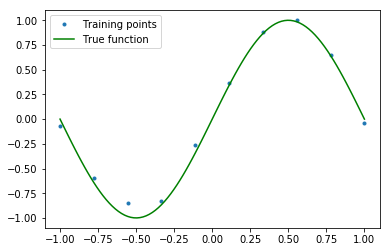

In [2]:
# generate and plot data
def get_toy_data(f, N):
    """
    input: N - Number of datapoints
    returns: x, y - vectors of length N
    """
    x = np.linspace(-1, 1, N)
    #x = np.random.uniform(-1, 1, N)
    y = f(x) + np.random.normal(0, 0.1, size=N)
    return x, y

def f(x):
    return np.sin(np.pi*x)


###
N = 10
x_train, y_train = get_toy_data(f, N)

# plot training points
plt.plot(x_train, y_train, ".", label="Training points")

# plot true function
x_plot = np.linspace(-1,1,100)
plt.plot(x_plot, f(x_plot), "g", label="True function")
plt.legend()

## Linear Regression with analytical solution
Literatur: Bishop, Pattern Recognition, Chaper 3.1

In [3]:
def get_basis_functions(poly_degree):
    return [lambda x, i=i: np.power(x, i) for i in range(poly_degree+1)]


def get_optimized_weights(x_train, y_train, bases_functions):
    D = len(bases_functions)

    # get design matrix
    phi = np.zeros((N,D))
    for n in range(N):
        for d in range(D):
            phi[n,d] = bases_functions[d](x_train[n])

    # shorter with list comprehension
    #phi = np.array([[bases_functions[d](x[n]) for d in range(D)] for n in range(N)])

    # learn the weights (Better to invert the matrix by QR decomposition)
    weights = np.linalg.inv( phi.T.dot(phi) ).dot( np.dot(phi.T, y_train) )
    return weights


def f_learned(x, bases_functions, weights):
    N, D = len(x), len(bases_functions)
    
    y_pred = np.zeros_like(x)
    for n in range(N):
        y_n = 0
        for d in range(D):
            y_n += weights[d]* bases_functions[d](x[n])
        y_pred[n] = y_n
    
    return y_pred

MSE: 0.21817638351997343
weights: [   0.16564178    2.79759789   -2.76025391   -0.80712891   28.2734375
  -18.34765625  -72.578125     28.046875    -15.5625        6.86798096
  147.875       -28.234375    -85.5           6.859375     31.
   -8.6875      104.5          15.25       -102.375        -3.7421875
  -33.3828125 ]


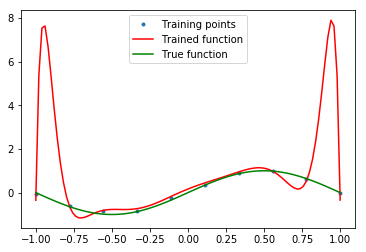

In [4]:
# define basis functions
poly_degree = 20
bases_fs = get_basis_functions(poly_degree)

# calculate weights
weights = get_optimized_weights(x_train, y_train, bases_fs)

# make predictions
y_pred = f_learned(x_train, bases_fs, weights)

# calulate Mean Squared Error
mse = sum(np.square(y_train-y_pred))
print("MSE: {}".format(mse))


## plot results
plt.plot(x_train, y_train, ".", label="Training points")

# plot predicted funtion
plt.plot(x_plot, f_learned(x_plot, bases_fs, weights), "r", label="Trained function")

# plot true function
plt.plot(x_plot, f(x_plot), "g", label="True function")
plt.legend()

# print weights
print("weights: {}".format(weights))

## Linear Regression with regularization

In [5]:
def get_regularized_optimized_weights(x_train, y_train, bases_functions, lam):
    N, D =len(x_train), len(bases_functions)

    # get design matrix
    phi = np.zeros((N,D))
    for n in range(N):
        for d in range(D):
            phi[n,d] = bases_functions[d](x_train[n])

    # shorter with list comprehension
    #phi = np.array([[bases_functions[d](x[n]) for d in range(D)] for n in range(N)])

    # learn the weights (Better to invert the matrix by QR decomposition)
    reg = lam*np.eye(D)
    weights = np.linalg.inv( phi.T.dot(phi) + reg ).dot( np.dot(phi.T, y_train) )
    return weights

MSE: 0.0397110482618786
weights: [ 0.0413239   2.41433823  0.081081   -1.84569731 -0.06771557 -1.06769111
 -0.10843252 -0.44969978 -0.07795807 -0.1108371  -0.03773099  0.07464128
 -0.00613428  0.17985627  0.01528068  0.2412408   0.02895218  0.27766397
  0.03744455  0.29947706  0.04265051]


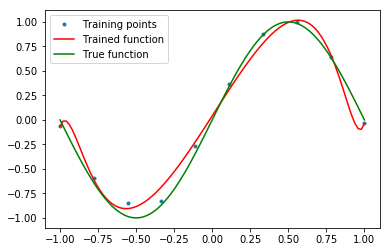

In [6]:
# define basis functions
poly_degree = 20
bases_fs = get_basis_functions(poly_degree)

# calculate weights
lam = 0.01
weights = get_regularized_optimized_weights(x_train, y_train, bases_fs, lam)

# make predictions
y_pred = f_learned(x_train, bases_fs, weights)

# calulate Mean Squared Error
mse = sum(np.square(y_train-y_pred))
print("MSE: {}".format(mse))


## plot results
plt.plot(x_train, y_train, ".", label="Training points")

# plot predicted funtion
plt.plot(x_plot, f_learned(x_plot, bases_fs, weights), "r", label="Trained function")

# plot true function
plt.plot(x_plot, f(x_plot), "g", label="True function")
plt.legend()

# print weights
print("weights: {}".format(weights))